In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import seaborn as sns
import pickle
import warnings
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [4]:
df.shape

(891, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
print(df['Pclass'].value_counts().sort_values())
print(df['Embarked'].value_counts().sort_values())

2    184
1    216
3    491
Name: Pclass, dtype: int64
Q     77
C    168
S    646
Name: Embarked, dtype: int64


In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df['Embarked']=df['Embarked'].replace({'Q':0,'S':1,'C':2})

<function matplotlib.pyplot.show(close=None, block=None)>

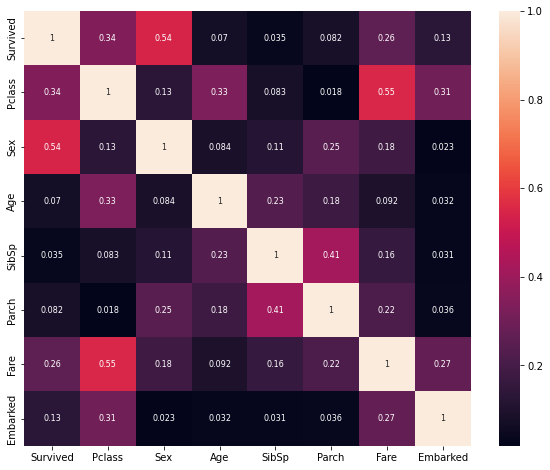

In [11]:
df_corr=df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':8})
plt.show

In [12]:
df=df.drop(['SibSp'],axis=1)
df=df.drop(['Fare'],axis=1)
df=df.drop(['Parch'],axis=1)

Since Fare and PClass are directly related, Fare can be removed as Pclass gives better approach by being categories.
Also Parch has very little impact so it will be excluded from model

In [13]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xsc = sc.fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(xsc,y,test_size=0.22,random_state=33)

In [16]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n ---- Train result ----")
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n ---- Test result ----")
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n Test Classification report \n',classification_report(y_test,pred,digits=2))

In [17]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 ---- Train result ----
Accuracy Score : 89.63%

 ---- Test result ----
Accuracy Score : 84.26%


 Test Classification report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       120
           1       0.86      0.71      0.78        77

    accuracy                           0.84       197
   macro avg       0.85      0.82      0.83       197
weighted avg       0.84      0.84      0.84       197



In [19]:
grid_param={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [20]:
grid_search = GridSearchCV(estimator=clf,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1)

In [21]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [22]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [23]:
clf=DecisionTreeClassifier(criterion='gini',max_depth= 10, max_leaf_nodes= 8, min_samples_leaf= 3, min_samples_split= 3)

In [24]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=8, min_samples_leaf=3,
                       min_samples_split=3)

In [25]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


 ---- Train result ----
Accuracy Score : 80.84%

 ---- Test result ----
Accuracy Score : 81.73%


 Test Classification report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       120
           1       0.79      0.73      0.76        77

    accuracy                           0.82       197
   macro avg       0.81      0.80      0.81       197
weighted avg       0.82      0.82      0.82       197



In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.8375634517766497


# Based on the results, we're going with Decision Tree Model

In [27]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
print(clf.predict(sc.transform([[1,0,24,0]])))

[0]


In [29]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,1
1,1,1,1,38.0,2
2,1,3,1,26.0,1
3,1,1,1,35.0,1
4,0,3,0,35.0,1


In [30]:
print(clf.predict(sc.transform([[1,1,38,2]])))

[1]


In [58]:
pickle.dump(clf,open('TitanicSurvivor','wb'))